In [520]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [521]:
nia = pd.read_excel('sampling_nia.xlsx')
nia.head()

,login_id,description,speed,device_name,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,ptt,zone,resolution_code ( target variable ),predicted_resolution_code
0,0,0.0,50Mbps,BAT_V1032_F999_0351,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,?
1,1,1.0,100Mbps,KLC_G002,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,?
2,2,2.0,50Mbps,SLB_G003,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,FDP_FASC_Connector_Replaced,?
3,3,2.0,50Mbps,BAT_V1064_0001,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,?
4,4,3.0,30Mbps,SGB_G006,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,?


In [522]:
print(nia.shape)

(1459, 14)


In [523]:
print(nia['resolution_code ( target variable )'].unique())

['Visit Charge Only' 'Advise Customer' 'FDP_FASC_Connector_Replaced'
 'Advise TMUC' 'TM_FTB FASC connector replaced'
 'FOC_OFM Pull n Resplice Cable' 'CCP_CPE Replaced'
 'TM_FTB Drop Fiber replaced' 'PG_Config_Changed' 'Jumper Changed'
 'Normalise_CPE Connection' 'VDSL_Reset' 'TMCPE Replaced' 'Port Change'
 'D/S Fiber cable replaced' 'VDSL_Config_Changed' 'Control card reset'
 'TM_CPE_IW_RJ11 Replaced' 'Int._Wiring Replaced/Repaired' 'ONU_Reset'
 'D/S Fiber cable restored' 'Resolved_By_NOVA' 'Cable_Reconnected'
 'STB_Reset' 'PG_Reset' 'Patching_Fiber Normalised' 'Reboot_STB'
 'Power Adaptor Replaced' 'ONU_Config_Changed' 'D/S Cable Replaced'
 'FOC_D/S cable replaced' 'AdviseTMUCtoProvide full info' 'Port Reset'
 'Configure Customer Account' 'Reassign Port' 'Connector_Replaced'
 'D/S Pair Changed' 'Remove illegal Connection' 'TM_CPE_IW_RJ45 Replaced'
 'VLAN changed' 'ODF Patch_Opt Connctr.Cleaned' 'D/S Pair Restored'
 'Customer CPE Own Configuration' 'Normalise_Power AdptrConnct.'
 'DP_

In [524]:
print(len(nia['resolution_code ( target variable )'].unique()))

47


In [525]:
print(nia.groupby('resolution_code ( target variable )').size())

resolution_code ( target variable )
Advise Customer                   231
Advise TMUC                       449
AdviseTMUCtoProvide full info      10
CCP_CPE Replaced                   12
Cable_Reconnected                  29
Configure Customer Account          2
Connector_Replaced                 12
Control card reset                 13
Customer CPE Own Configuration      2
Customer_Reconnect CPE              2
D/S Cable Replaced                  4
D/S Cable Restored                  2
D/S Fiber cable replaced          102
D/S Fiber cable restored           15
D/S Pair Changed                    6
D/S Pair Restored                   2
DP_Re-jumper                        4
FDP_FASC_Connector_Replaced        34
FOC_D/S cable replaced             10
FOC_OFM Pull n Resplice Cable      10
Int._Wiring Replaced/Repaired       9
Jumper Changed                     18
Normalise_CPE Connection           57
Normalise_Power AdptrConnct.        2
ODF Patch_Opt Connctr.Cleaned       3
ONU_Config_Cha

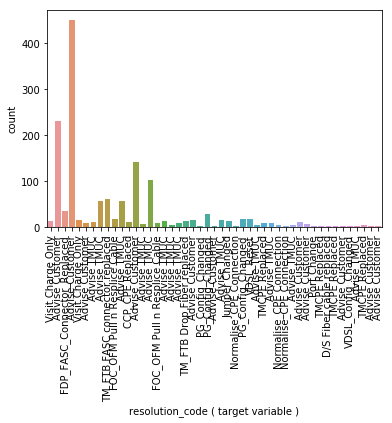

In [526]:
import seaborn as sns
sns.countplot(nia['resolution_code ( target variable )'],label="Count").set_xticklabels(nia['resolution_code ( target variable )'], rotation=90)
plt.show()

In [527]:
print(nia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
login_id                               1459 non-null int64
description                            1453 non-null float64
speed                                  1459 non-null object
device_name                            1459 non-null object
exchange_id                            1459 non-null object
btu_type                               1459 non-null object
created_by                             1459 non-null object
closed_by                              1459 non-null object
btu_platform                           1459 non-null object
symptom_error_code                     1459 non-null object
ptt                                    1459 non-null object
zone                                   1459 non-null object
resolution_code ( target variable )    1459 non-null object
predicted_resolution_code              1459 non-null object
dtypes: float64(1), int64(1), object(12)
memory usage

In [528]:
# remove null values from dataset
nia_copy = nia.copy()
nia_copy = nia_copy.fillna(nia_copy['description'].value_counts().index[0])
print(nia_copy.isnull().sum())
print(nia_copy.info())

login_id                               0
description                            0
speed                                  0
device_name                            0
exchange_id                            0
btu_type                               0
created_by                             0
closed_by                              0
btu_platform                           0
symptom_error_code                     0
ptt                                    0
zone                                   0
resolution_code ( target variable )    0
predicted_resolution_code              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
login_id                               1459 non-null int64
description                            1459 non-null float64
speed                                  1459 non-null object
device_name                            1459 non-null object
exchange_id                            1459 non-null object
btu_ty

In [529]:
# convert login & description into string 
nia_copy['login_id'] = nia_copy['login_id'].astype(str)
nia_copy['description'] = nia_copy['description'].astype(str)
print(nia_copy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
login_id                               1459 non-null object
description                            1459 non-null object
speed                                  1459 non-null object
device_name                            1459 non-null object
exchange_id                            1459 non-null object
btu_type                               1459 non-null object
created_by                             1459 non-null object
closed_by                              1459 non-null object
btu_platform                           1459 non-null object
symptom_error_code                     1459 non-null object
ptt                                    1459 non-null object
zone                                   1459 non-null object
resolution_code ( target variable )    1459 non-null object
predicted_resolution_code              1459 non-null object
dtypes: object(14)
memory usage: 159.7+ KB
None


In [530]:
# drop columns (reduce dimensionalty) irrelevant/uninsightful for training
nia_copy.drop(['device_name', 'ptt', 'zone', 'predicted_resolution_code'], axis=1, inplace=True)
nia_copy.head()

,login_id,description,speed,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,resolution_code ( target variable )
0,0,0.0,50Mbps,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,Visit Charge Only
1,1,1.0,100Mbps,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,Advise Customer
2,2,2.0,50Mbps,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,FDP_FASC_Connector_Replaced
3,3,2.0,50Mbps,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,Advise Customer
4,4,3.0,30Mbps,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,Visit Charge Only


In [531]:
nia_dataset = nia_copy.values
X = nia_dataset[:, :-1]
X = X.astype(str)
y = nia_dataset[:,-1]

In [532]:
print(X.shape)
print(y.shape)

(1459, 9)
(1459,)


In [533]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (977, 9) (977,)
Test (482, 9) (482,)


In [534]:
print(X_train)
print(y_train)

[['494' '2.0' '10Mbps' ... 'X1001255' 'HUAWEI' 'Line Disconnect']
 ['234' '2.0' '100Mbps' ... 'WFSMS_USER' 'HUAWEI' 'Line Disconnect']
 ['181' '102.0' '30Mbps' ... 'X0804220' 'ZTE' 'Line Disconnect']
 ...
 ['625' '481.0' '10Mbps' ... 'X1001589' 'HUAWEI' 'Line Disconnect']
 ['203' '2.0' '100Mbps' ... 'X1110490' 'HUAWEI' 'Slow Browsing']
 ['558' '465.0' '50Mbps' ... 'X1110490' 'HUAWEI' 'Line Disconnect']]
['Advise TMUC' 'D/S Fiber cable replaced' 'Advise Customer' 'Advise TMUC'
 'Advise Customer' 'Advise Customer' 'TMCPE Replaced' 'ONU_Config_Changed'
 'PG_Reset' 'Advise Customer' 'Advise TMUC' 'Advise TMUC'
 'Visit Charge Only' 'Advise TMUC' 'Cable_Reconnected' 'PG_Config_Changed'
 'Advise TMUC' 'Advise Customer' 'Advise TMUC' 'D/S Pair Changed'
 'Advise TMUC' 'D/S Fiber cable restored' 'Resolved_By_NOVA'
 'D/S Fiber cable replaced' 'Advise TMUC' 'D/S Fiber cable replaced'
 'Advise TMUC' 'VDSL_Config_Changed' 'Advise TMUC' 'Advise Customer'
 'TMCPE Replaced' 'Control card reset' 'Advise

In [535]:
# encode data 
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# encode inputs
X_train_enc = oe.fit_transform(X_train)
X_test_enc = oe.fit_transform(X_test)

#encode output
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [536]:
# load various classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# generate models
gnb = GaussianNB()
lr = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='auto')
lrcv = LogisticRegressionCV(cv=5, random_state=0)
knn = KNeighborsClassifier()

# fit models
gnb.fit(X_train_enc, y_train_enc)
lr.fit(X_train_enc, y_train_enc)
lrcv.fit(X_train_enc, y_train_enc)
knn.fit(X_train_enc, y_train_enc)

# test models
yhat_gnb = gnb.predict(X_test_enc)
yhat_lr = lr.predict(X_test_enc)
yhat_lrcv = lrcv.predict(X_test_enc)
yhat_knn = knn.predict(X_test_enc)

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterati

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\TM35361\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_mode

In [537]:
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy_gnb = accuracy_score(y_test_enc, yhat_gnb)
accuracy_lr = accuracy_score(y_test_enc, yhat_lr)
accuracy_lrcv = accuracy_score(y_test_enc, yhat_lrcv)
accuracy_knn = accuracy_score(y_test_enc, yhat_knn)

print('GNB Accuracy: %.2f' % (accuracy_gnb*100))
print('LR Accuracy: %.2f' % (accuracy_lr*100))
print('LRCV Accuracy: %.2f' % (accuracy_lrcv*100))
print('KNN Accuracy: %.2f' % (accuracy_knn*100))

GNB Accuracy: 8.51
LR Accuracy: 23.86
LRCV Accuracy: 25.93
KNN Accuracy: 17.84


In [538]:
# encode all input data
X_enc = oe.fit_transform(X)

# test models on all input data
y_gnb = gnb.predict(X_enc)
y_lr = lr.predict(X_enc)
y_lrcv = lrcv.predict(X_enc)
y_knn = knn.predict(X_enc)

In [539]:
print(X.shape)
print(X_enc.shape)

(1459, 9)
(1459, 9)


In [540]:
# encode all output data
y_enc = le.fit_transform(y)
print(y.shape)
print(y_enc.shape)

(1459,)
(1459,)


In [541]:
# evaluate predictions on all data

accuracy_gnb_all = accuracy_score(y_enc, y_gnb)
accuracy_lr_all = accuracy_score(y_enc, y_lr)
accuracy_lrcv_all = accuracy_score(y_enc, y_lrcv)
accuracy_knn_all = accuracy_score(y_enc, y_knn)

print('GNB Accuracy: %.2f' % (accuracy_gnb_all*100))
print('LR Accuracy: %.2f' % (accuracy_lr_all*100))
print('LRCV Accuracy: %.2f' % (accuracy_lrcv_all*100))
print('KNN Accuracy: %.2f' % (accuracy_knn_all*100))

GNB Accuracy: 8.16
LR Accuracy: 29.27
LRCV Accuracy: 29.40
KNN Accuracy: 26.66


In [542]:
predicted_resolution_code = le.inverse_transform(y_lrcv)

In [543]:
nia['predicted_resolution_code'] = predicted_resolution_code
nia

,login_id,description,speed,device_name,exchange_id,btu_type,created_by,closed_by,btu_platform,symptom_error_code,ptt,zone,resolution_code ( target variable ),predicted_resolution_code
0,0,0.0,50Mbps,BAT_V1032_F999_0351,BAT,VDSL2 MODEM,X1608111,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,Advise TMUC
1,1,1.0,100Mbps,KLC_G002,KLC,ONU,X1502129,X1005164,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,Advise TMUC
2,2,2.0,50Mbps,SLB_G003,SLB,ONU,X1011239,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,FDP_FASC_Connector_Replaced,Advise TMUC
3,3,2.0,50Mbps,BAT_V1064_0001,BAT,VDSL2 MODEM,X1501258,X0908131,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,Advise TMUC
4,4,3.0,30Mbps,SGB_G006,SGB,ONU,X1503136,X1005045,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Visit Charge Only,Advise TMUC
5,5,4.0,100Mbps,SGB_G011,SGB,ONU,X1007465,X0911177,HUAWEI,Noisy,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise Customer,Advise TMUC
6,6,2.0,50Mbps,SGB_G001,SGB,FTB,X0902023,X0903186,FIBERHOME,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise TMUC,Advise Customer
7,7,2.0,10Mbps,BAT_G008,BAT,ONU,X1109193,X1003915,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,Advise TMUC,Advise TMUC
8,8,5.0,50Mbps,BAT_G011,BAT,ONU,X1502156,X1101280,HUAWEI,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,TM_FTB FASC connector replaced,TM_CPE_IW_RJ45 Replaced
9,9,2.0,30Mbps,SGB_V1035_0120,SGB,VDSL2 MODEM,X1001350,X0802320,ZTE,Line Disconnect,SELANGOR TIMUR 1,ZONE KEPONG & BATU,FOC_OFM Pull n Resplice Cable,Advise TMUC


In [544]:
nia.to_excel("predicted_nia.xlsx")